## Project description

Big online store wants to boost its revenue.<br>
Analists and the marketing department was given a task to
* compile a list of hypotheses, 
* prioritize these hypotheses, 
* launch an A/B test, 
* and analyze its results.

### Download the data and prepare it for the analysis

Let's load all the libraries, download the data and take a look at it.

In [1]:
#load all the libraries
import pandas as pd
import datetime as dt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'
from scipy import stats as st
import numpy as np
import math as mth
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#download datasets using try-except statment
try:
    hypotheses = pd.read_csv('hypotheses_us.csv')
    orders = pd.read_csv('orders_us.csv')
    visits = pd.read_csv('visits_us.csv')
except:
    hypotheses = pd.read_csv('/datasets/hypotheses_us.csv')
    orders = pd.read_csv('/datasets/orders_us.csv')
    visits = pd.read_csv('/datasets/visits_us.csv')

In [3]:
#general info about datasets
hypotheses.info(memory_usage='deep')
print('----------------------------------------------------')
orders.info(memory_usage='deep')
print('----------------------------------------------------')
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Hypothesis;Reach;Impact;Confidence;Effort  9 non-null      object
dtypes: object(1)
memory usage: 1.4 KB
----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 174.3 KB
----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 t

In [4]:
#overview of datasets
hypotheses.head()
orders.head()
visits.head()

,Hypothesis;Reach;Impact;Confidence;Effort
0,Add two new channels for attracting traffic. T...
1,Launch your own delivery service. This will sh...
2,Add product recommendation blocks to the store...
3,Change the category structure. This will incre...
4,Change the background color on the main page. ...


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [5]:
#checking duplicates
hypotheses.duplicated().sum()
orders.duplicated().sum()
visits.duplicated().sum()

0

0

0

### Description of the data

hypotheses dataset

* `Hypotheses` — brief descriptions of the hypotheses
* `Reach` — user reach, on a scale of one to ten
* `Impact` — impact on users, on a scale of one to ten
* `Confidence` — confidence in the hypothesis, on a scale of one to ten
* `Effort` — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.


orders dataset
* `transactionId` — order identifier
* `visitorId` — identifier of the user who placed the order
* `date` — of the order
* `revenue` — from the order
* `group` — the A/B test group that the user belongs to

visits dataset
* `date` — date
* `group` — A/B test group
* `visits` — the number of visits on the date specified in the A/B test group specified



### What we see in the data
hypotheses dataset
1. Dataset needs to be separated properly - as we see the separator here is the ";"
2. For further convenience column names need to be transformed to lowercase.

orders and visits dataset datasets
1. Dates are in the object format, we'll transform them to the datetime format.

There is no missising values or duplicates.

Let's reload datasets and at the same time convert all the columns to appropriate format.

In [6]:
#reload datasets using try-except statment
try:
    hypotheses = pd.read_csv('hypotheses_us.csv', sep=";")
    orders = pd.read_csv('orders_us.csv', parse_dates=['date'])
    visits = pd.read_csv('visits_us.csv', parse_dates=['date'])
except:
    hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=";")
    orders = pd.read_csv('/datasets/orders_us.csv', parse_dates=['date'])
    visits = pd.read_csv('/datasets/visits_us.csv', parse_dates=['date'])

In [7]:
#general info about datasets
hypotheses.info(memory_usage='deep')
print('----------------------------------------------------')
orders.info(memory_usage='deep')
print('----------------------------------------------------')
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 1.6 KB
----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object

Let's rename columns

In [8]:
#lowering the columns names
hypotheses.columns = hypotheses.columns.str.lower()

#setting the maximum width of columns 
pd.options.display.max_colwidth = 150
hypotheses

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [9]:
#renaming the columns
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


## Part 1. Prioritizing Hypotheses

We have created a comprehensive list of 9 hypotheses aimed at increasing the sales of our online store. 

Each hypothesis has 4 parameters that we can use to assess its significance: reach, impact, confidence, and effort.

To prioritize these hypotheses and determine the most effective course of action, we will use the ICE and RICE models.



In [10]:
hypotheses

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


### ICE

Impact, confidence, effort (ICE) is one of the most popular ways of prioritizing hypotheses.

In [11]:
#calculating ICE column and adding a rank for it
hypotheses['ICE'] = (hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']
hypotheses['ICE_rank'] = hypotheses['ICE'].rank(method='min', ascending=False).astype(int)
hypotheses[['hypothesis', 'ICE', 'ICE_rank']].sort_values(by='ICE_rank')

,hypothesis,ICE,ICE_rank
8,Launch a promotion that gives users discounts on their birthdays,16.200000,1
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333,2
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000,3
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000,4
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000,5
1,Launch your own delivery service. This will shorten delivery time,2.000000,6
5,Add a customer review page. This will increase the number of orders,1.333333,7
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000,8
4,Change the background color on the main page. This will increase user engagement,1.000000,9


We see three leaders - 
* Launch a promotion that gives users discounts on their birthdays;
* Add two new channels for attracting traffic;
* Add a subscription form to all the main pages.

Let's look at the next model.

### RICE

The RICE model is an extension of the ICE model, analyzing impact, confidence, effort, and an additional parameter - the reach. The reach parameter provides insights into the number of users who will be impacted by the proposed update we intend to introduce.


In [12]:
#calculating RICE column and adding rank for it
hypotheses['RICE'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']
hypotheses['RICE_rank'] = hypotheses['RICE'].rank(method='min', ascending=False).astype(int)

hypotheses[['hypothesis', 'RICE', 'RICE_rank']].sort_values(by='RICE_rank')

,hypothesis,RICE,RICE_rank
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0,1
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0,2
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0,3
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0,3
8,Launch a promotion that gives users discounts on their birthdays,16.2,5
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0,6
1,Launch your own delivery service. This will shorten delivery time,4.0,7
5,Add a customer review page. This will increase the number of orders,4.0,7
4,Change the background color on the main page. This will increase user engagement,3.0,9


We see that leaders are different according to the RICE model.
* Add a subscription form to all the main pages;
* Add product recommendation blocks to the store's site;
* Add two new channels for attracting traffic.

Let's look at the both ranks at the same time.

In [13]:
hypotheses[['hypothesis', 'ICE_rank', 'RICE_rank']].sort_values(by='ICE_rank')

,hypothesis,ICE_rank,RICE_rank
8,Launch a promotion that gives users discounts on their birthdays,1,5
0,Add two new channels for attracting traffic. This will bring 30% more users,2,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,3,1
6,Show banners with current offers and sales on the main page. This will boost conversion,4,3
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,5,2
1,Launch your own delivery service. This will shorten delivery time,6,7
5,Add a customer review page. This will increase the number of orders,7,7
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,6
4,Change the background color on the main page. This will increase user engagement,9,9


If we look at both ranks at the same time we'll see that the top 5 will be the same! It's the same hypotheses but in different places. So now the only thing that we need to do is to decide which area of our business needs our attention first. 

Is it to bring more new clients? 
* Add two new channels for attracting traffic
* Add a subscription form to all the main pages

Or raise conversion?
* Show banners with current offers and sales on the main page
* Add product recommendation blocks to the store's site

Or encourage clients to buy more?
* Launch a promotion that gives users discounts on their birthdays


And as we contemplate our next moves to enhance our business strategy, there are A/B test results from prior hypothesis testing that are awaiting analysis.

## Part 2. A/B Test. Data preprocessing.

We have two datasets for analysis:

* "orders" dataset - this dataset contains information about completed transactions, including unique identifiers for users and orders, transaction timestamps, and the assigned group (A or B) for each user.

* "visits" dataset - this dataset provides aggregated information on the number of visits from each group (A and B) on each day of the test.

First of all we need to check if our groups are separated properly. We'll check if there are users who got in two groups.

In [14]:
#creating dataframe with the number of groups for each user
visitor_two_groups = orders.groupby('visitor_id')['group'].nunique().reset_index()
visitor_two_groups.columns = ['visitor_id', 'n_of_groups']
visitor_two_groups


,visitor_id,n_of_groups
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


In [15]:
#merging this dataset with orders
orders = orders.merge(visitor_two_groups, on='visitor_id')

#Calculating the share of unique users who were assined in two groups and orders they have made.
orders.query('n_of_groups == 2')
orders.query('n_of_groups == 2')['visitor_id'].nunique()
orders.query('n_of_groups == 2')['visitor_id'].nunique()/orders['visitor_id'].nunique()
len(orders.query('n_of_groups == 2'))/len(orders)

,transaction_id,visitor_id,date,revenue,group,n_of_groups
2,2961555356,4069496402,2019-08-15,10.2,A,2
3,1473132782,4069496402,2019-08-12,10.8,B,2
23,2904772834,963407295,2019-08-15,5.6,B,2
24,1458356232,963407295,2019-08-14,80.0,A,2
27,4252514150,351125977,2019-08-15,235.6,B,2
...,...,...,...,...,...,...
1136,1254962016,2654030115,2019-08-14,35.5,A,2
1173,1277417350,3963646447,2019-08-14,100.2,A,2
1174,2289555915,3963646447,2019-08-14,120.2,B,2
1182,4052155355,2949041841,2019-08-14,5.9,A,2


58

0.05625606207565471

0.15121136173767752

We have 58 unique visitors who accidentally turned out to be in two groups at the same time. It's 5.6% of all unique users participated in the test.

These visitors made 181 transactions which is 15% of all transactions. It is a noticeable percentage but in this case we need to delete these rows and ask to review the selection algorithm. 

In [16]:
#deleting users who are in two groups
orders = orders[orders['n_of_groups'] != 2].reset_index(drop=True)

## A/B Test Analysis.

And now we can proceed with the analysis of A/B test results.

### Cumulative dataframe

In order to prevent the peeking problem we are going to analyze graphs of cumulative metrics. Let's create a dataframe with cumulative information.

In [17]:
#creating an array with unique paired date-group values
date_group = orders[['date','group']].drop_duplicates()

#aggregating revenue and counting unique users and orders in orders table
orders_total = (date_group.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                        orders['group'] == x['group'])]
                        .agg({'date' : 'max', 
                              'group' : 'max', 
                              'transaction_id' : 'nunique', 
                              'visitor_id' : 'nunique', 
                              'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']))

#aggregating  number of visits in visits table
visits_total = date_group.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], 
                                                              visits['group'] == x['group'])]
                              .agg({'date' : 'max', 
                                    'group' : 'max', 
                                    'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

#merging the tables with date and group columns
total = visits_total.merge(orders_total, left_on=['date', 'group'], right_on=['date', 'group'])

#renaming the columns
total.rename(columns={'transaction_id':'orders', 'visitor_id': 'visitors'}, inplace=True)


total.head()
total.tail()

,date,group,visits,orders,visitors,revenue
0,2019-08-01,A,719,23,19,2266.6
1,2019-08-01,B,713,17,17,967.2
2,2019-08-02,A,1338,42,36,3734.9
3,2019-08-02,B,1294,40,39,3535.3
4,2019-08-03,A,1845,66,60,5550.1


,date,group,visits,orders,visitors,revenue
57,2019-08-29,B,17708,510,490,74576.7
58,2019-08-30,A,18037,460,437,52363.7
59,2019-08-30,B,18198,531,511,77863.5
60,2019-08-31,A,18736,468,445,53212.0
61,2019-08-31,B,18916,548,528,79651.2


###  Cumulative revenue by group.

First let's take a look at the general revenue for both groups.

In [18]:
print('Revenue from group A is', int(orders[orders['group'] == 'A']['revenue'].sum()), 'USD')
print('Revenue from group B is', int(orders[orders['group'] == 'B']['revenue'].sum()), 'USD')

Revenue from group A is 53212 USD
Revenue from group B is 79651 USD


Group B is better in terms of the revenue.

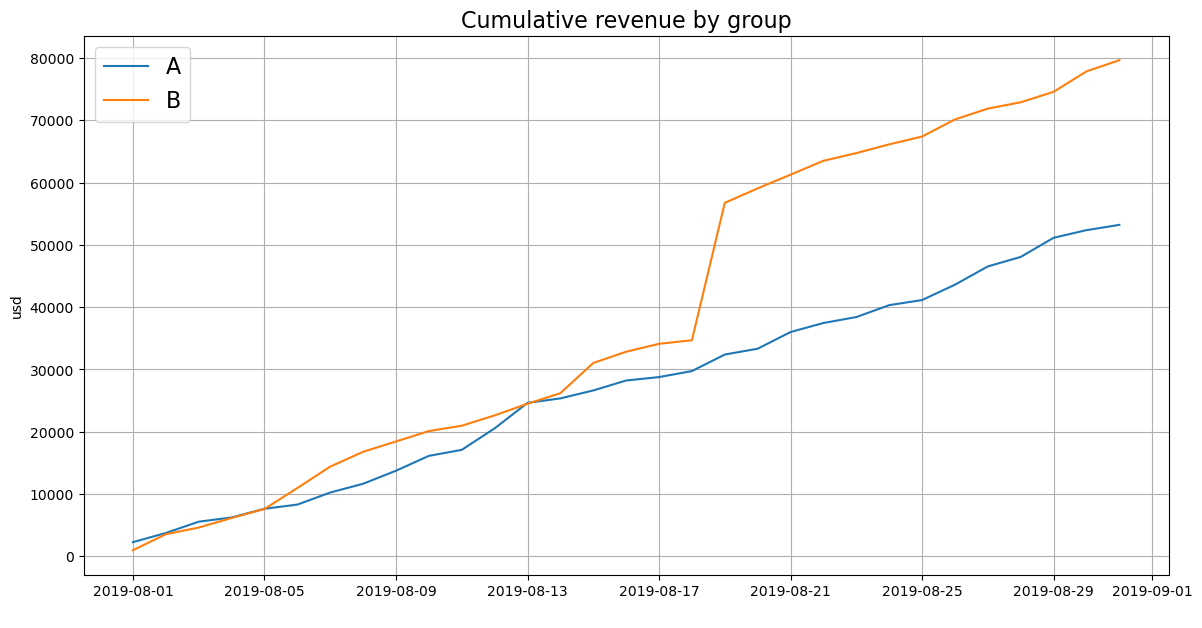

In [19]:
#plotting the graph with the cumulative revenue for groups A and B
plt.figure(figsize=(14,7))
ax = sns.lineplot(data=total, x='date', y='revenue', hue='group')
ax.grid(axis='both')
ax.set_title('Cumulative revenue by group', fontsize=16)
legend = ax.legend(fontsize=16)
ax.set_ylabel('usd')
ax.set_xlabel(' ');

Graph shows us that in the beginning of the test both groups behaved alike but after 19th of August group B became a leader. Rise in revenue for group B on this date was fast and significant so we need to investigate it.

### Revenue by group in dynamics

Let's take a look at the daily revenue graph. But first let's create dataframe with agregated daily data - we'll need it if we want to investigate daily changes. 

In [20]:
#creating aggregated dataframe from order dataset grouped by date and group 
#calculating number of unique users, amount of orders and sum of revenue
agg_data = orders.groupby(['date','group']).agg({
    'visitor_id': 'nunique', 
    'transaction_id': 'count', 
    'revenue': 'sum'}).reset_index()
agg_data.columns = ['date', 'group', 'customers', 'orders', 'revenue']

#sorting visits dataset in order to be able to add it to aggrerated dataframe
visits = visits.sort_values(by=['date', 'group']).reset_index(drop=True)

#merging
agg_data = agg_data.merge(visits, how='inner', on=['date', 'group'])
agg_data

,date,group,customers,orders,revenue,visits
0,2019-08-01,A,19,23,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,18,19,1468.3,619
3,2019-08-02,B,22,23,2568.1,581
4,2019-08-03,A,24,24,1815.2,507
...,...,...,...,...,...,...
57,2019-08-29,B,15,15,1681.2,531
58,2019-08-30,A,8,9,1228.9,490
59,2019-08-30,B,21,21,3286.8,490
60,2019-08-31,A,8,8,848.3,699


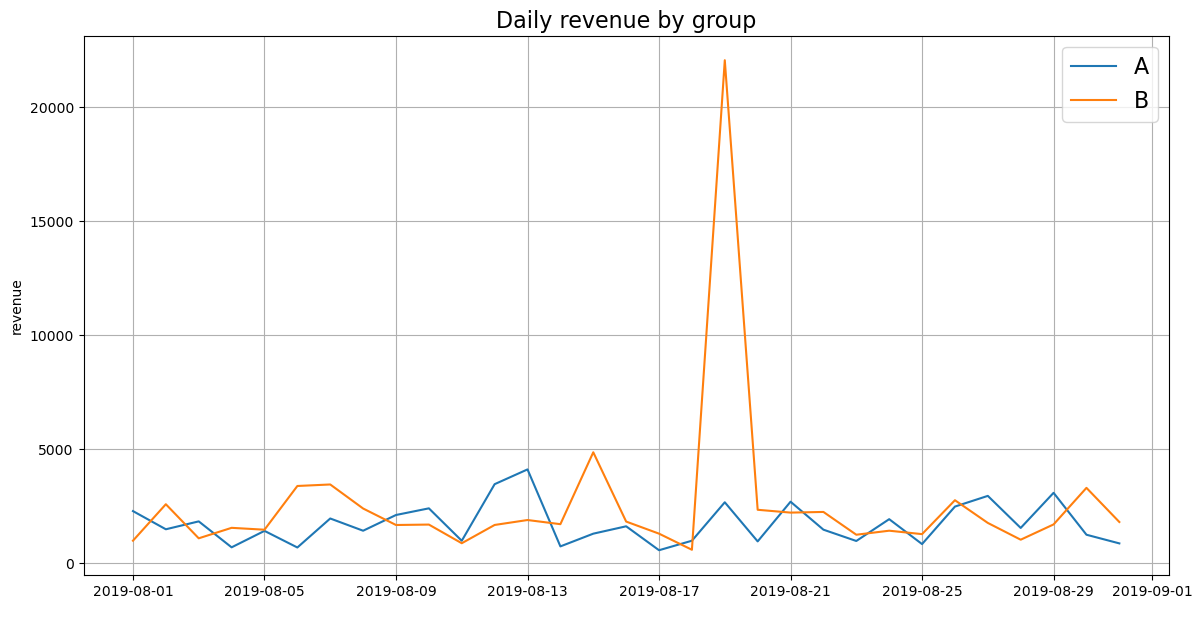

In [21]:
#plotting the graph with the daily revenue for groups A and B
plt.figure(figsize=(14,7))
ax = sns.lineplot(data=agg_data, x='date', y='revenue', hue='group')
ax.grid(axis='both')
ax.set_title('Daily revenue by group', fontsize=16)
legend = ax.legend(fontsize=16)
ax.set_ylabel('revenue')
ax.set_xlabel(' ');

As we expected on the 19th of August there was a significant rise in revenue for group B - amount of the revenue on this date was more than 20K, but the difference between daily revenue for both groups for the rest of the time wasn't so noticeable and was only up to 5K.

### Cumulative average order size by group

Now let's take a look at the cumulative average order size. We'll divide cumulative revenue by the cumulative number of orders.

In [22]:
#calculating average order size
total['avg_order'] = total['revenue']/total['orders']
total

,date,group,visits,orders,visitors,revenue,avg_order
0,2019-08-01,A,719,23,19,2266.6,98.547826
1,2019-08-01,B,713,17,17,967.2,56.894118
2,2019-08-02,A,1338,42,36,3734.9,88.926190
3,2019-08-02,B,1294,40,39,3535.3,88.382500
4,2019-08-03,A,1845,66,60,5550.1,84.092424
...,...,...,...,...,...,...,...
57,2019-08-29,B,17708,510,490,74576.7,146.228824
58,2019-08-30,A,18037,460,437,52363.7,113.834130
59,2019-08-30,B,18198,531,511,77863.5,146.635593
60,2019-08-31,A,18736,468,445,53212.0,113.700855


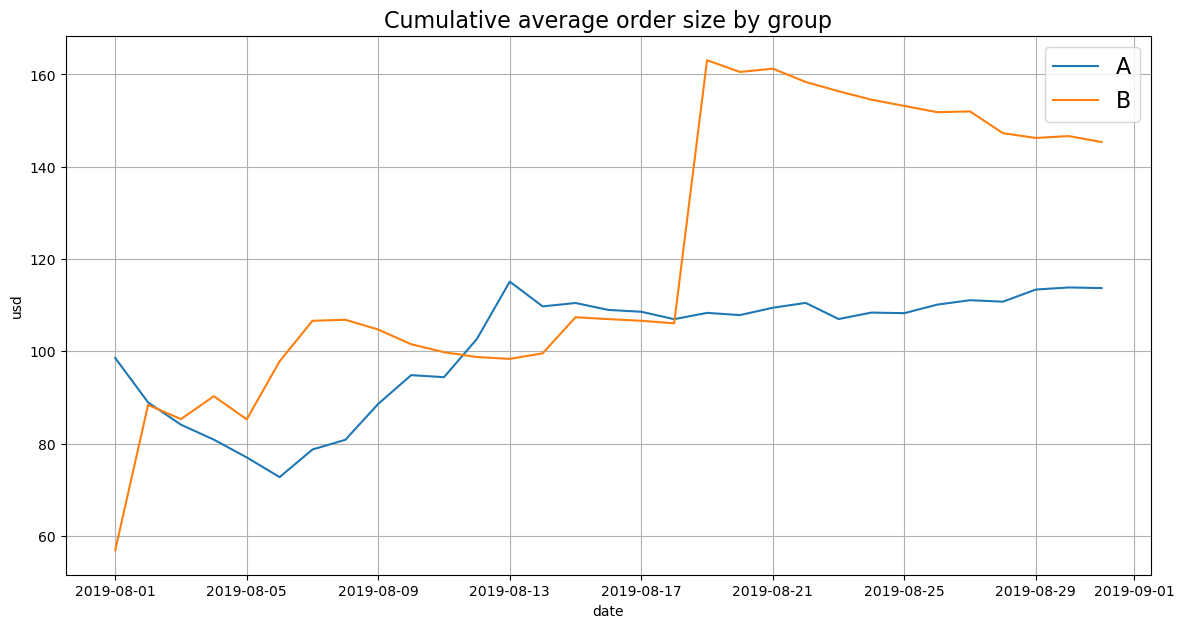

In [23]:
#plotting the graph with cumulative average order size for groups A and B
plt.figure(figsize=(14,7))
ax = sns.lineplot(data=total, x='date', y='avg_order', hue='group')
ax.grid(axis='both')
ax.set_title('Cumulative average order size by group', fontsize=16)
legend = ax.legend(fontsize=16)
ax.set_ylabel('usd')
ax.set_xlabel('date');

Here we observe a consistent trend. Until the 19th of August, the average order size varied for each group on different dates. However, after the 19th of August, Group B emerged as the clear leader with consistently larger average order sizes compared to Group A.

Let's take a look at the average order size in the not cumulative daily data.

In [24]:
#calculating average order size
agg_data['avg_order'] = agg_data['revenue']/agg_data['orders']
agg_data

,date,group,customers,orders,revenue,visits,avg_order
0,2019-08-01,A,19,23,2266.6,719,98.547826
1,2019-08-01,B,17,17,967.2,713,56.894118
2,2019-08-02,A,18,19,1468.3,619,77.278947
3,2019-08-02,B,22,23,2568.1,581,111.656522
4,2019-08-03,A,24,24,1815.2,507,75.633333
...,...,...,...,...,...,...,...
57,2019-08-29,B,15,15,1681.2,531,112.080000
58,2019-08-30,A,8,9,1228.9,490,136.544444
59,2019-08-30,B,21,21,3286.8,490,156.514286
60,2019-08-31,A,8,8,848.3,699,106.037500


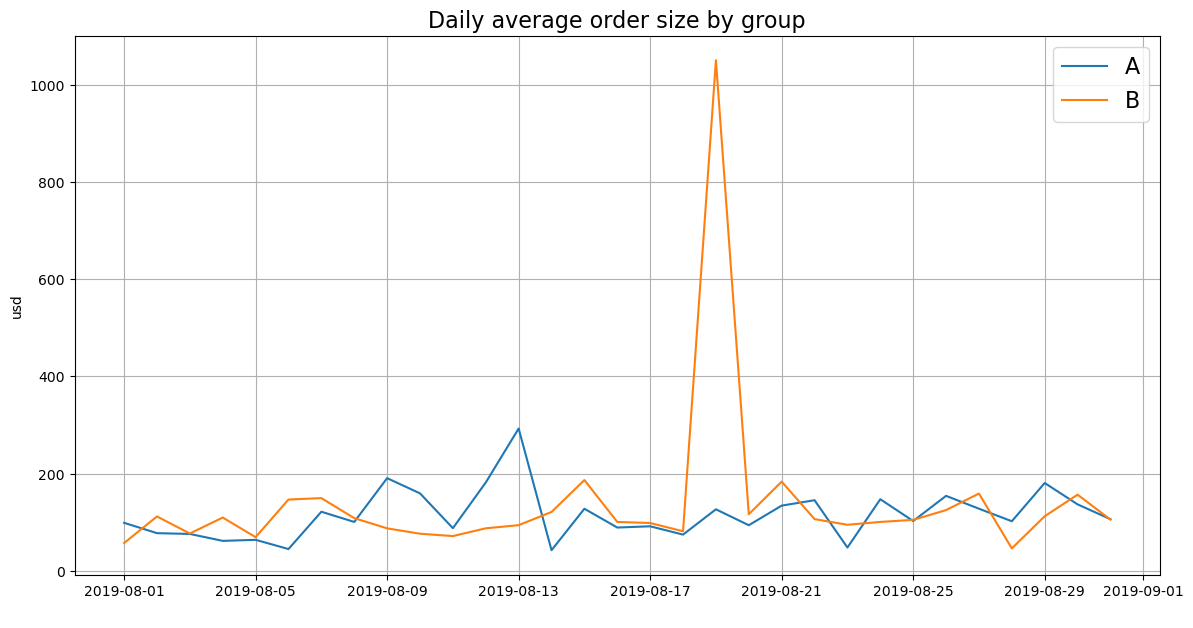

In [25]:
#plotting the graph with daily average order size for groups A and B
plt.figure(figsize=(14,7))
ax = sns.lineplot(data=agg_data, x='date', y='avg_order', hue='group')
ax.grid(axis='both')
ax.set_title('Daily average order size by group', fontsize=16)
legend = ax.legend(fontsize=16)
ax.set_ylabel('usd')
ax.set_xlabel(' ');

We also see here the same behavior - peaking average order on 19th of August in group B - we definitely should remember this while identifying outliers.

### The relative difference in cumulative average order size for group B compared with group A. 

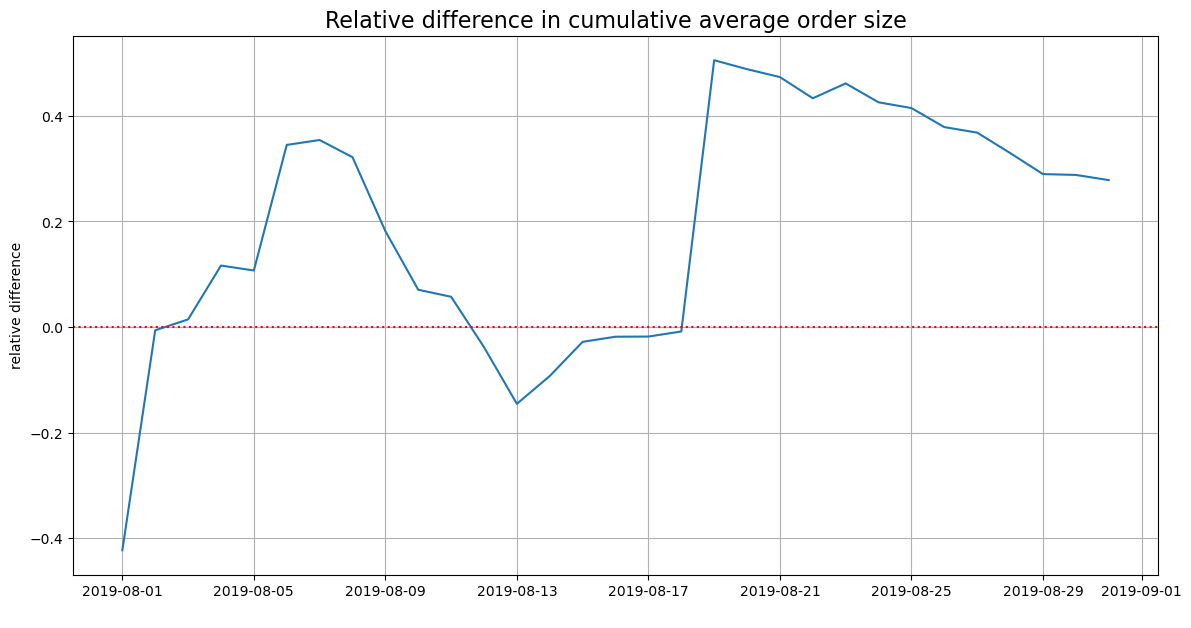

In [26]:
#filtering cumulative dataframe for groups A and B
order_avg_a = total.query('group=="A"')[['date', 'avg_order']]
order_avg_b = total.query('group=="B"')[['date', 'avg_order']]

#merging the tables
order_avg = order_avg_a.merge(order_avg_b, left_on='date', right_on='date', how='left', suffixes=['a', 'b'])

#calculating relative difference
order_avg['order_relative'] = (order_avg.avg_orderb / order_avg.avg_ordera) - 1

#plotting relative difference
plt.figure(figsize=(14,7))
ax = sns.lineplot(data=order_avg, x='date', y='order_relative')
ax.grid(axis='both')
plt.axhline(y=0, linestyle='dotted', color = 'red')
plt.title('Relative difference in cumulative average order size', fontsize=16)
ax.tick_params(axis='x')
ax.set_ylabel('relative difference')
ax.set_xlabel(' ');

The relative difference in cumulative average order size shows us that for most of the time group B is noticeably better than group A, by the end of the test the relative difference was around 28%.

### Conversion rate

Let's calculate each group's conversion rate as the ratio of orders to the number of visits for each day. First let's take a look at the cumulative data.

In [27]:
#calculating cumulative conversion
total['conversion'] = total['orders']/total['visits']
total.head()

,date,group,visits,orders,visitors,revenue,avg_order,conversion
0,2019-08-01,A,719,23,19,2266.6,98.547826,0.031989
1,2019-08-01,B,713,17,17,967.2,56.894118,0.023843
2,2019-08-02,A,1338,42,36,3734.9,88.926190,0.031390
3,2019-08-02,B,1294,40,39,3535.3,88.382500,0.030912
4,2019-08-03,A,1845,66,60,5550.1,84.092424,0.035772


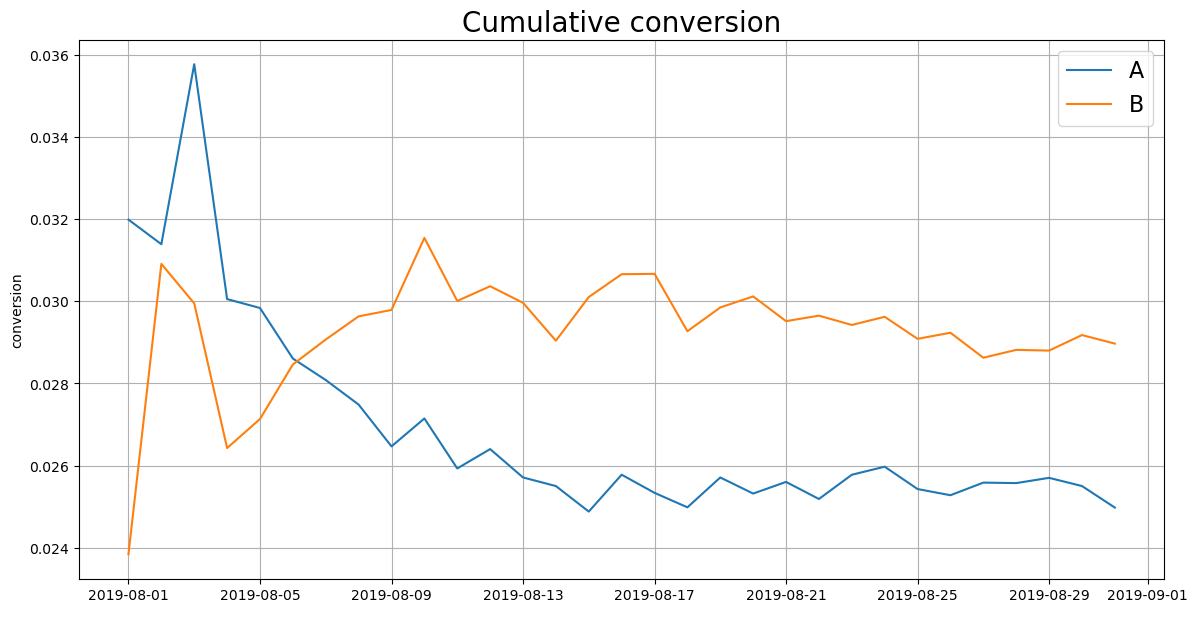

In [28]:
#plotting cumulative conversion
plt.figure(figsize=(14,7))
ax = sns.lineplot(data=total, x='date', y='conversion', hue='group')
ax.grid(axis='both')
ax.set_title('Cumulative conversion', fontsize=20)
legend = ax.legend(fontsize=16)
ax.set_ylabel('conversion')
ax.set_xlabel(' ');

In the beginning of the test group A was performing better in terms of conversion but after 6th of August group B became a leader and continued such behavior till the end of the test.

Let's take a look at the relative difference in conversion.

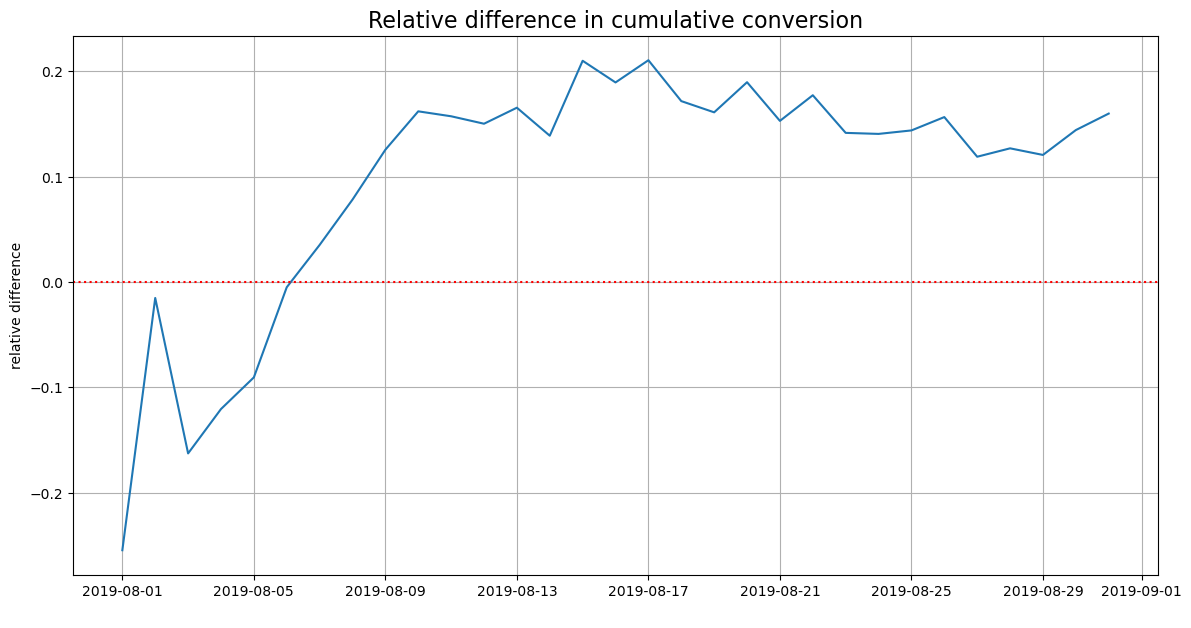

In [29]:
#filtering cumulative dataframe for groups A and B
conversion_a = total.query('group=="A"')[['date', 'conversion']]
conversion_b = total.query('group=="B"')[['date', 'conversion']]

#merging the tables
conversion = conversion_a.merge(conversion_b, left_on='date', right_on='date', how='left', suffixes=['a', 'b'])

#calculating relative difference in conversion
conversion['conversion_relative'] = (conversion.conversionb / conversion.conversiona) - 1

#plotting relative difference in conversion
plt.figure(figsize=(14,7))
ax = sns.lineplot(data=conversion, x='date', y='conversion_relative')
ax.grid(axis='both')
plt.axhline(y=0, linestyle='dotted', color = 'red')
plt.title('Relative difference in cumulative conversion', fontsize=16)
ax.tick_params(axis='x')
ax.set_ylabel('relative difference')
ax.set_xlabel(' ');

At the end of the test group B is better than group A by 16%.

Let's also look at the daily conversion.

In [30]:
#calculating daily conversion
agg_data['conversion'] = agg_data.orders/agg_data.visits
agg_data.head()

,date,group,customers,orders,revenue,visits,avg_order,conversion
0,2019-08-01,A,19,23,2266.6,719,98.547826,0.031989
1,2019-08-01,B,17,17,967.2,713,56.894118,0.023843
2,2019-08-02,A,18,19,1468.3,619,77.278947,0.030695
3,2019-08-02,B,22,23,2568.1,581,111.656522,0.039587
4,2019-08-03,A,24,24,1815.2,507,75.633333,0.047337


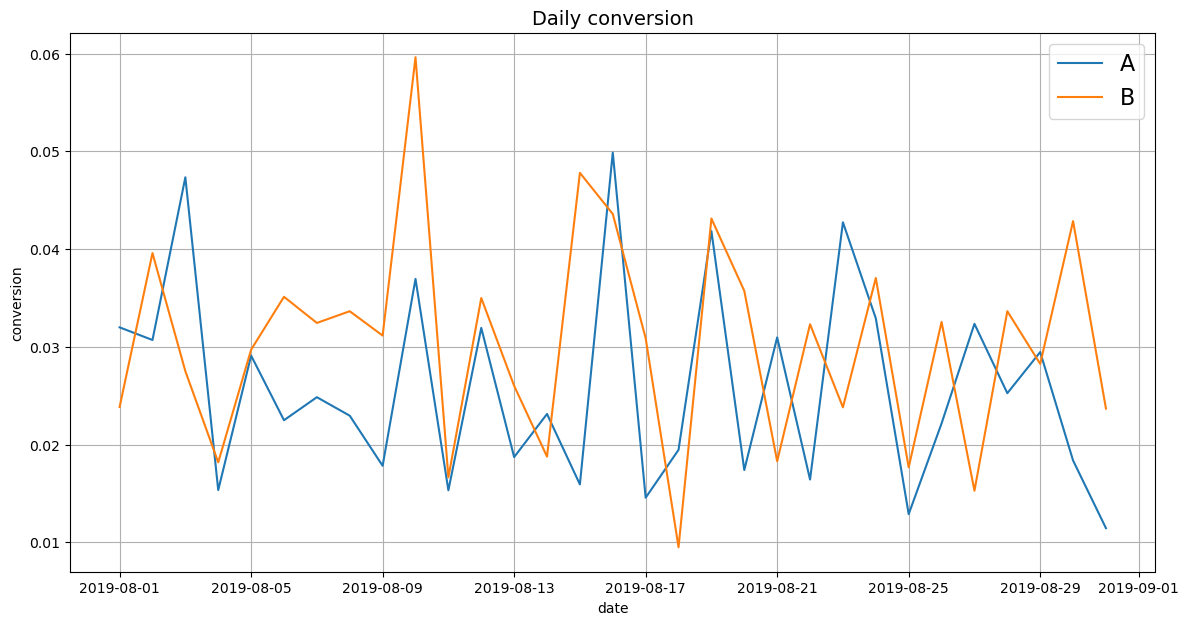

In [31]:
#plotting daily conversion
plt.figure(figsize=(14,7))
ax = sns.lineplot(data=agg_data, x='date', y='conversion', hue='group')
ax.grid(axis='both')
ax.set_title('Daily conversion', fontsize=14)
legend = ax.legend(fontsize=16)
ax.set_ylabel('conversion')
ax.set_xlabel('date');

Not cumulative data didn't bring us additionnal insights as it was with revenue and average order size. 

Now let's calculate total conversion.

In [32]:
print('Group A total conversion is',round(agg_data.query('group=="A"')['orders'].sum()
      /agg_data.query('group=="A"')['visits'].sum(),3))
print('Group B total conversion is',round(agg_data.query('group=="B"')['orders'].sum()
      /agg_data.query('group=="B"')['visits'].sum(),3))

Group A total conversion is 0.025
Group B total conversion is 0.029


Although Group B is slightly better, the difference is not significant. It achieves a conversion rate of 2.9% compared to Group A's conversion rate of 2.5%.

## Identifying outliers

Based on our previous analysis, it appears that there are outliers in the orders dataset, specifically regarding the revenue for Group B on August 19th, which experienced a significant spike. This could potentially be attributed to either a single large order or multiple orders. To further investigate and understand the situation, let's dive deeper into the data.

### Number of orders per user

Let's start with the number of orders per user.

In [33]:
#calculating number of orders per user
orders_by_users = orders.groupby('visitor_id')['transaction_id'].nunique().reset_index()
orders_by_users.columns = ['visitor_id', 'n_of_orders']

orders = orders.merge(orders_by_users, on='visitor_id')

orders.head()

,transaction_id,visitor_id,date,revenue,group,n_of_groups,n_of_orders
0,3667963787,3312258926,2019-08-15,30.4,B,1,1
1,2804400009,3642806036,2019-08-15,15.2,B,1,1
2,3797467345,1196621759,2019-08-15,155.1,B,1,1
3,2282983706,2322279887,2019-08-15,40.5,B,1,1
4,182168103,935554773,2019-08-15,35.0,B,1,1


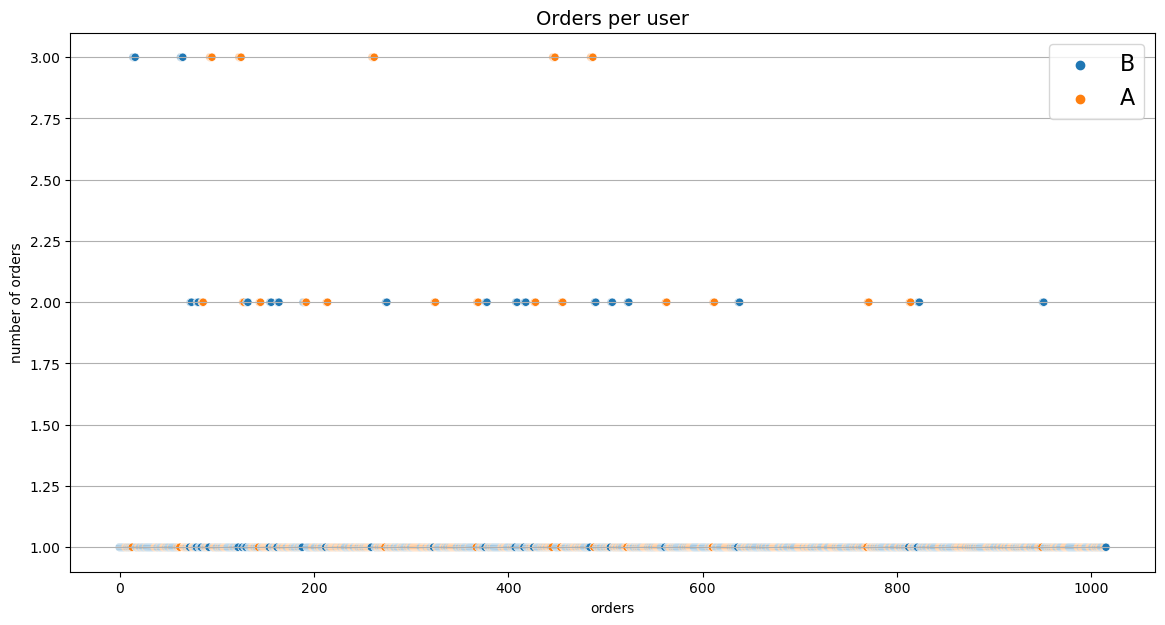

In [34]:
#plotting scatter graph of number of orders per user
x_values = pd.Series(range(0, len(orders)))

plt.figure(figsize=(14,7))
ax = sns.scatterplot(data=orders,x= x_values, y='n_of_orders', hue='group')
ax.grid(axis='y')
ax.set_title('Orders per user', fontsize=14)
legend = ax.legend(fontsize=16)
ax.set_xlabel('orders')
ax.set_ylabel('number of orders');

We see here that most of the customers had 1 order, some had 2 and just a small amount of customers had 3 orders. Let's find the 95th and the 99th percentile to accurately identify outliers.

In [35]:
#finding the 95th and the 99th percentile
print('5% of customers have', int(np.percentile(orders['n_of_orders'], 95)), 'orders')
print('1% of customers have', int(np.percentile(orders['n_of_orders'], 99)), 'orders')

5% of customers have 2 orders
1% of customers have 3 orders


We can consider 3 orders per user as an outlier.

### Order price

As our orders table consists of an actual transactions that customers made each day we can take the `revenue` column to find what are outliers in the order price.

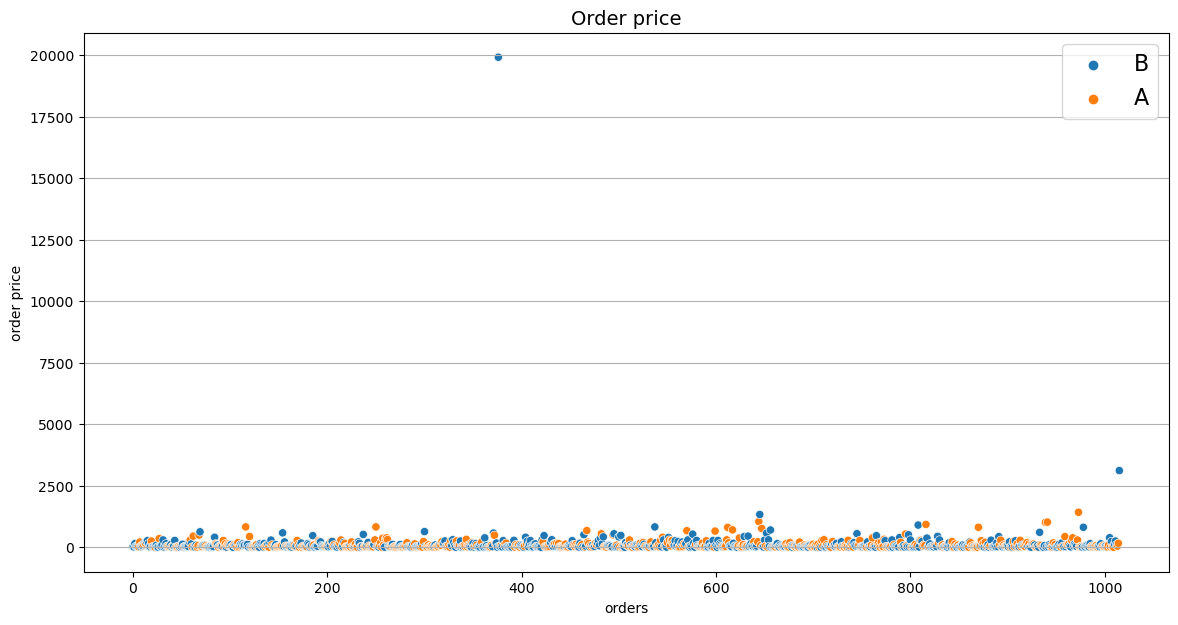

In [36]:
#plotting scatter graph of order price
x_values = pd.Series(range(0, len(orders)))

plt.figure(figsize=(14,7))
ax = sns.scatterplot(data=orders,x= x_values, y='revenue', hue='group')
ax.grid(axis='y')
ax.set_title('Order price', fontsize=14)
legend = ax.legend(fontsize=16)
ax.set_xlabel('orders')
ax.set_ylabel('order price');

We see that there is just one enormously big order around 20K and another one around 2.6K both in group B. Everything else looks very homogeneous. Let's find the 95th and the 99th percentile to accurately identify outliers. 

In [37]:
print('5% of orders are less than', int(np.percentile(orders['revenue'], 95)), 'USD')
print('1% of orders are less than', int(np.percentile(orders['revenue'], 99)), 'USD')

5% of orders are less than 414 USD
1% of orders are less than 830 USD


We can consider 830 USD per order as a threshold for an outlier.

### Filtering outliers

Now let's look at our outliers.

In [38]:
#creating dataframe with outliers
outliers = orders[(orders['revenue'] > 830) | (orders['n_of_orders'] > 2)].reset_index(drop=True)
outliers

#calculating the share of outliers in orders dataset
outliers['visitor_id'].nunique()
len(outliers)
len(outliers)/len(orders)

,transaction_id,visitor_id,date,revenue,group,n_of_groups,n_of_orders
0,2550768810,2742574263,2019-08-15,235.0,B,1,3
1,3176574859,2742574263,2019-08-22,275.9,B,1,3
2,234238251,2742574263,2019-08-21,150.4,B,1,3
3,3721196264,249864742,2019-08-16,15.0,B,1,3
4,4140190337,249864742,2019-08-24,10.5,B,1,3
5,3057892078,249864742,2019-08-21,90.1,B,1,3
6,627804981,611059232,2019-08-01,275.8,A,1,3
7,365058890,611059232,2019-08-01,45.3,A,1,3
8,735232225,611059232,2019-08-01,140.4,A,1,3
9,3163614039,2254586615,2019-08-22,830.3,A,1,1


19

33

0.03248031496062992

We have 19 customers who made either 3 orders or orders that cost more than 830 USD. These customers made 33 orders and it's 3.2% of our orders dataset. Let's filter them out.

In [39]:
#filtering out outliers
orders_filtered = orders[(orders['revenue'] < 830) & (orders['n_of_orders'] <= 2)].reset_index(drop=True)
orders_filtered.head()
orders_filtered.tail()

,transaction_id,visitor_id,date,revenue,group,n_of_groups,n_of_orders
0,3667963787,3312258926,2019-08-15,30.4,B,1,1
1,2804400009,3642806036,2019-08-15,15.2,B,1,1
2,3797467345,1196621759,2019-08-15,155.1,B,1,1
3,2282983706,2322279887,2019-08-15,40.5,B,1,1
4,182168103,935554773,2019-08-15,35.0,B,1,1


,transaction_id,visitor_id,date,revenue,group,n_of_groups,n_of_orders
978,38478481,1197745035,2019-08-14,135.3,B,1,1
979,3592955527,608641596,2019-08-14,255.7,B,1,1
980,2662137336,3733762160,2019-08-14,100.8,B,1,1
981,2203539145,370388673,2019-08-14,50.1,A,1,1
982,1807773912,573423106,2019-08-14,165.3,A,1,1


### Key performance metrics on filtered data

Let's see how revenue and conversion would look like if we take only filrted data.

### Revenue

In [40]:
print('Revenue from group A is', int(orders_filtered[orders_filtered['group'] == 'A']['revenue'].sum()), 'USD')
print('Revenue from group B is', int(orders_filtered[orders_filtered['group'] == 'B']['revenue'].sum()), 'USD')

Revenue from group A is 44437 USD
Revenue from group B is 52762 USD


Group B is still better in terms of general revenue even after removing outliers.

We'll create a dataframe with cumulative filrted data.

In [41]:
#creating an array with unique paired date-group values
date_group = orders_filtered[['date','group']].drop_duplicates()

#aggregating revenue and counting unique users and orders in orders table
orders_total_filtered = (date_group.apply(lambda x: orders_filtered[np.logical_and(orders_filtered['date'] <= x['date'], 
                                                        orders_filtered['group'] == x['group'])]
                        .agg({'date' : 'max', 
                              'group' : 'max', 
                              'transaction_id' : 'nunique', 
                              'visitor_id' : 'nunique', 
                              'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']))

#aggregating  number of visits in visits table
visits_total = date_group.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], 
                                                              visits['group'] == x['group'])]
                              .agg({'date' : 'max', 
                                    'group' : 'max', 
                                    'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

#merging the tables with date and group columns
total_filtered = visits_total.merge(orders_total_filtered, left_on=['date', 'group'], right_on=['date', 'group'])

#renaming the columns
total_filtered.rename(columns={'transaction_id':'orders', 'visitor_id': 'visitors'}, inplace=True)


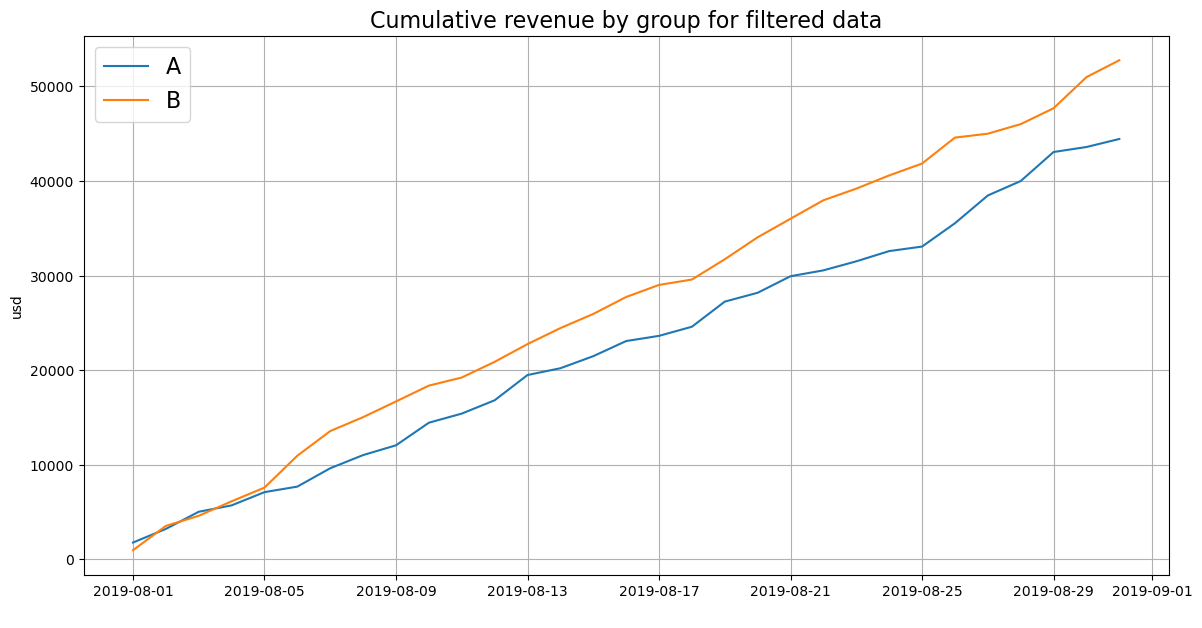

In [42]:
#plotting the graph with the cumulative revenue for groups A and B for filrted data
plt.figure(figsize=(14,7))
ax = sns.lineplot(data=total_filtered, x='date', y='revenue', hue='group')
ax.grid(axis='both')
ax.set_title('Cumulative revenue by group for filtered data', fontsize=16)
legend = ax.legend(fontsize=16)
ax.set_ylabel('usd')
ax.set_xlabel(' ');

We see here a picture of consistently growing revenue for both groups with a pretty stable gap between them. 
Group B is a stabilized leader.

### Conversion

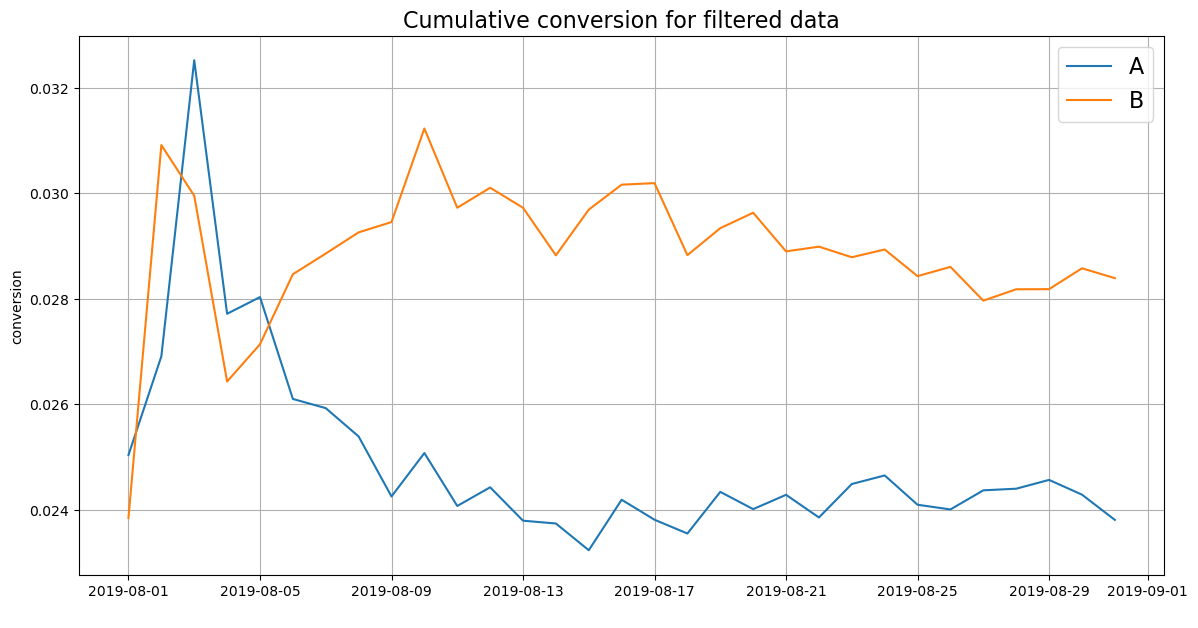

In [43]:
#calculating cumulative conversion for filrted data
total_filtered['conversion'] = total_filtered['orders']/total_filtered['visits']

#plotting cumulative conversion for filrted data
plt.figure(figsize=(14,7))
ax = sns.lineplot(data=total_filtered, x='date', y='conversion', hue='group')
ax.grid(axis='both')
ax.set_title('Cumulative conversion for filtered data', fontsize=16)
legend = ax.legend(fontsize=16)
ax.set_ylabel('conversion')
ax.set_xlabel(' ');

Graph of conversion for filtered data also shows the clear leadership of group B.

## A/B test. First conclusion.

We analyzed two datasets: "orders" and "visits."<br>
The "orders" dataset contained information about completed transactions, including unique user and order identifiers, timestamps, and the assigned group (A or B) for each user. 
The "visits" dataset provided aggregated information on the number of visits from each group (A and B) on each day of the test.

In the "orders" dataset, we discovered that 58 unique visitors accidentally ended up being assigned to both groups simultaneously, which accounts for 5.6% of all unique users who participated in the test. These visitors made 181 transactions, which represents 15% of all transactions. This percentage is significant, so it is crucial to remove these rows and reassess the selection algorithm to prevent such occurrences in the future.

To avoid the peeking problem, we decided to analyze graphs of cumulative metrics.

#### Revenue:
Group A generated 53212 USD in revenue.<br>
Group B generated 79651 USD in revenue.<br>
Based on the cumulative revenue graph, both groups initially exhibited similar behavior. However, after August 19th, Group B became the leader, experiencing a rapid and significant increase in revenue. Further investigation was required to understand this sudden surge. On August 19th, there was indeed a substantial rise in daily revenue for Group B, surpassing 20K. However, the difference in daily revenue between the two groups for the remaining duration of the test was not as noticeable, typically reaching up to 5K.

#### Order size:<br>
The order size graph revealed a consistent trend. Prior to August 19th, the average order size varied between the groups on different dates. However, following August 19th, Group B consistently maintained larger average order sizes compared to Group A. This behavior was also observed in the cumulative average order size graph. By the end of the test, Group B exhibited a relative difference of around 28% in terms of average order size.

#### Conversion:<br>
Initially, Group A performed better in terms of conversion. However, after August 6th, Group B took the lead and maintained it until the end of the test. The final results showed that Group B outperformed Group A by 16% in terms of conversion. The total conversion rates were 0.025 for Group A and 0.029 for Group B. Although Group B had a slightly higher conversion rate, the difference was not significant.

#### Outliers:<br>
We identified that 5% of customers placed 2 orders, while 1% of customers placed 3 orders. We considered 3 orders per user as an outlier. Additionally, 5% of orders had a value lower than 414 USD, and 1% of orders had a value lower than 830 USD. We used 830 USD as the threshold for an outlier in terms of order value. Filtering out these outliers resulted in 19 customers who had either 3 orders or orders exceeding 830 USD in value. These customers accounted for 33 orders, representing 3.2% of the orders dataset.

#### Insights from the filtered data:<br>
Revenue from Group A amounted to 44437 USD<br>
Revenue from Group B amounted to 52762 USD<br>
Even after removing outliers, Group B continued to outperform Group A in terms of overall revenue. The cumulative revenue graph showed a consistent upward trend for both groups, with a stable gap between them. Group B maintained its leadership position throughout the test.
The graph of conversion rates for the filtered data also reinforced the clear leadership of Group B.

Let's move on to the statistical tests.

## A/B test. Statistical significance of the difference between the groups.

As we want to conduct a statistical test four times (difference in conversion and order size for raw and filtered data), we would like to make it easyer. So we'll create a function for that.

In [44]:
#creating the function for performing statistical test
def testing_average(sample1,sample2,alpha=0.05):
    #checking normality
    sample1=sample1.dropna()
    sample2=sample2.dropna()
    stat1, p1_norm=stats.shapiro(sample1)
    stat2, p2_norm=stats.shapiro(sample2)
    if p1_norm > alpha and p2_norm>alpha:
        print('Distributions of both samples are normal, performing t-test')
        #if both normal, perform t-test.
        #for t-test also should check the equality of variances
        statslev,p_levene=stats.levene(sample1, sample2)
        if p_levene<alpha:
            print('Variances are not equal')
            #if variances are not equal
            statist,p_value=stats.ttest_ind(sample1, sample2,equal_var=False)
        else:
            print('Variances are equal')
            statist,p_value=stats.ttest_ind(sample1, sample2,equal_var=True) 
    else:
        print('Distributions of samples are not normal, performing Mann-Whitney U test')
        #if both not normal, perform Mann-Whitney U test
        statist,p_value=stats.mannwhitneyu(sample1, sample2)
    print('p-value is',p_value)
    if p_value<alpha:
        print('Reject the null hypothesis - samples are significantly different')
    else:
        print('Failed to reject the null hypothesis - samples are not significantly different')
    print('Relative difference between groups', sample2.mean()/sample1.mean()-1)

### RAW DATA

### Statistical significance of the difference in conversion between the groups using the raw data

Let's prerare the samples for the statistical test. 

In order to calculate statistical significance of the difference in conversion we need the groups samples to consist of two parts:
* a list of the number of orders for each user
* zeroes for users who didn't order anything. Their number is the difference between the total number of visitors and the number of records on orders. We'll create a pd.Series object with the required length.


In [45]:
#calculating the number of orders per user in two groups
orders_by_users_a = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg(
    {'transaction_id' : pd.Series.nunique})

orders_by_users_b = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg(
    {'transaction_id' : pd.Series.nunique})

#renaming columns
orders_by_users_a.columns = ['visitor_id', 'orders']
orders_by_users_b.columns = ['visitor_id', 'orders'] 


#creating the samples by adding zeros to the orders_by_users tables
sample_a_conversion = pd.concat([orders_by_users_a['orders'], 
                                 pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() 
                                                  - len(orders_by_users_a['orders'])), name='orders')],axis=0)

sample_b_conversion = pd.concat([orders_by_users_b['orders'], 
                                 pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() 
                                                  - len(orders_by_users_b['orders'])), name='orders')],axis=0)


Let's formulate our hypotheses:

H0: conversion in two groups is not significantly different.

H1: conversion in two groups is significantly different.

In [46]:
#calling the function with a significance level of 5%
testing_average(sample_a_conversion,sample_b_conversion, alpha=0.05)

Distributions of samples are not normal, performing Mann-Whitney U test
p-value is 0.011018084110014696
Reject the null hypothesis - samples are significantly different
Relative difference between groups 0.1597977924896936


/Users/Kapara/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Based on the analysis of the raw data, we observe that the p-value is smaller than the chosen significance level. Therefore, we reject the null hypothesis and conclude that there is a significant difference in conversion rates between the two groups.

Furthermore, we find that the relative difference in means between the two groups is 16%. This means that Group B outperforms Group A by 16% in terms of conversion rate.

### Statistical significance of the difference in average order size between the groups using the raw data.

Let's prerare the samples for the statistical test. 
As we mentionned before our orders table consists of an actual transactions that customers made each day so we can treat `revenue` column as order's size.

In [47]:
#creating samples for order sizes of groups A and B
sample_a_order_size = orders.query('group=="A"')['revenue'].reset_index(drop=True)
sample_b_order_size = orders.query('group=="B"')['revenue'].reset_index(drop=True)

Let's formulate our hypotheses:

H0: order size in two groups is not significantly different.

H1: order size in two groups is significantly different.

In [48]:
#calling the function with a significance level of 5%
testing_average(sample_a_order_size,sample_b_order_size, alpha=0.05)

Distributions of samples are not normal, performing Mann-Whitney U test
p-value is 0.8622329690015668
Failed to reject the null hypothesis - samples are not significantly different
Relative difference between groups 0.2783448769307848


Based on the analysis of the raw data, we see that the p-value is larger than the chosen significance level, so we fail to reject the null hypothesis. This implies that there is no significant difference in order size between the two groups.
However, despite the lack of statistical significance, there is a substantial relative difference between the means of the two groups, amounting to nearly 28%. But we remember that there are some outliers in raw data and this noticeable relative difference is a result of calculating with them.

### FILTERED DATA

Let's move on to the filtered data.

### Statistical significance of the difference in conversion between the groups using the filtered data

We need to prepare the samples the same way we did it with the raw data.

In [49]:
#calculating the number of orders per user in two groups
orders_f_by_users_a = orders_filtered[orders_filtered['group']=='A'].groupby('visitor_id', as_index=False).agg(
    {'transaction_id' : pd.Series.nunique})

orders_f_by_users_b = orders_filtered[orders_filtered['group']=='B'].groupby('visitor_id', as_index=False).agg(
    {'transaction_id' : pd.Series.nunique})

#renaming columns
orders_f_by_users_a.columns = ['visitor_id', 'orders']
orders_f_by_users_b.columns = ['visitor_id', 'orders'] 


#creating the samples by adding zeros to the orders_by_users tables
sample_a_conversion_f = pd.concat([orders_f_by_users_a['orders'], 
                                 pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() 
                                                  - len(orders_f_by_users_a['orders'])), name='orders')],axis=0)

sample_b_conversion_f = pd.concat([orders_f_by_users_b['orders'], 
                                 pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() 
                                                  - len(orders_f_by_users_b['orders'])), name='orders')],axis=0)


Let's formulate our hypotheses:

H0: conversion in two groups is not significantly different.

H1: conversion in two groups is significantly different.

In [50]:
#calling the function with a significance level of 5%
testing_average(sample_a_conversion_f,sample_b_conversion_f, alpha=0.05)

Distributions of samples are not normal, performing Mann-Whitney U test
p-value is 0.0062083132347477525
Reject the null hypothesis - samples are significantly different
Relative difference between groups 0.1925785654206893


/Users/Kapara/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Based on the analysis of the filtered data, we observe that the p-value is smaller than the chosen significance level. And also it's smaler than it was when raw data was tested. 

Therefore, we reject the null hypothesis and conclude that there is a significant difference in conversion rates between the two groups.

Furthermore, we find that the relative difference in means between the two groups is 19% - bigger by 3% than with raw data. This means that Group B outperforms Group A by 19% in terms of conversion rate.

### Statistical significance of the difference in average order size between the groups using the filtered data

In [51]:
#creating samples for order sizes of groups A and B
sample_a_order_f_size = orders_filtered.query('group=="A"')['revenue'].reset_index(drop=True)
sample_b_order_f_size = orders_filtered.query('group=="B"')['revenue'].reset_index(drop=True)

Hypotheses are:

H0: order size in two groups is not significantly different.

H1: order size in two groups is significantly different.

In [52]:
#calling the function with a significance level of 5%
testing_average(sample_a_order_f_size,sample_b_order_f_size, alpha=0.05)

Distributions of samples are not normal, performing Mann-Whitney U test
p-value is 0.8767101122551697
Failed to reject the null hypothesis - samples are not significantly different
Relative difference between groups -0.013861500572296404


Based on the analysis of the filtered data, we see that the p-value is larger than the chosen significance level (and larger than it was with the raw data), so we fail to reject the null hypothesis. This implies that there is no significant difference in order size between the two groups.

And the relative difference between groups is significantly smaller compared to the large relative difference exhibited by the raw data, which included outliers.

## A/B test. Statistical significance of the difference between the groups. Conclusion.

We conducted a statistical analysis to determine the significance of the difference in conversion rates and order sizes between groups A and B using both raw and filtered data. Due to the non-normal distributions in the samples, we performed a Mann-Whitney U test.

For the conversion rates, the hypotheses were as follows:<br>
**H0: There is no significant difference in conversion rates between the two groups.**<br>
**H1: There is a significant difference in conversion rates between the two groups.**<br>

Based on the analysis of the raw data, we found that the p-value was smaller than the chosen significance level. Therefore, we rejected the null hypothesis and concluded that there is a significant difference in conversion rates between the two groups. Furthermore, the relative difference in means between the two groups was observed to be 16%. This indicates that Group B outperforms Group A by 16% in terms of conversion rate.

Upon analyzing the filtered data, we found that the p-value was smaller than the chosen significance level and even smaller than the p-value obtained from the raw data analysis. Consequently, we rejected the null hypothesis and concluded that there is a significant difference in conversion rates between the two groups. Additionally, we observed a relative difference in means of 19%, which is 3% larger than the relative difference obtained from the raw data analysis. This means that Group B outperforms Group A by 19% in terms of conversion rate.

For the order sizes, the hypotheses were:<br>
**H0: There is no significant difference in order sizes between the two groups.**<br>
**H1: There is a significant difference in order sizes between the two groups.**<br>

Based on the analysis of the raw data, we found that the p-value was larger than the chosen significance level, indicating that we failed to reject the null hypothesis. Therefore, there is no significant difference in order sizes between the two groups. However, despite the lack of statistical significance, there is a substantial relative difference of nearly 28% between the means of the two groups. It is important to note that this noticeable relative difference is a result of including outliers in the raw data.

When analyzing the filtered data, we found that the p-value was still larger than the chosen significance level (and larger than the p-value from the raw data analysis), leading us to fail to reject the null hypothesis. This suggests that there is no significant difference in order sizes between the two groups. Moreover, the relative difference between the groups is significantly smaller compared to the large relative difference observed in the raw data, which included outliers.

## General conclusion

The big online store has set a goal to increase its revenue, and to achieve this, we have been tasked with compilation a list of hypotheses, prioritizing these hypotheses, launching an A/B test, and analyzing its results.

#### Prioritizing Hypotheses
We have developed a list of 9 hypotheses with the goal of increasing sales for our online store. Each hypothesis was evaluated based on 4 parameters: reach, impact, confidence, and effort. To prioritize these hypotheses and determine the most effective actions, we utilized the ICE (impact, confidence, effort) and RICE (impact, confidence, effort, and reach) models.

Interestingly, the top 5 hypotheses are consistent across both models, but in different rankings. This suggests a clear focus for our attention. Now, our task is to determine which area of our business requires immediate action.

Should we concentrate on acquiring new clients? In that case, we consider implementing the following hypotheses:

* Add two new channels for attracting traffic.
* Add a subscription form to all the main pages.

Alternatively, if our priority is to improve conversion rates, we should consider:
* Show banners with current offers and sales on the main page.
* Add product recommendation blocks to the store's site.

Furthermore, if the aim is to encourage existing clients to make more purchases, our attention should be directed towards:
* Launching a promotion that offers users discounts on their birthdays.


#### A/B test

We analyzed two datasets - "orders" and "visits".<br>
In the "orders" dataset, 5.6% of unique users were accidentally assigned to both groups, resulting in 181 transactions (15% of total). We deleted these users.<br>
* Cumulative revenue graph showed Group B outperforming Group A, with a significant increase after August 19th.<br>
* Group B had consistently larger average order sizes than Group A after August 19th, with a relative difference of around 28%.<br>
* Group B took the lead in conversion rates after August 6th, outperforming Group A by 16%.<br>
* Identified outliers: We considered 3 orders per user as an outlier and also we used 830 USD as the threshold for an outlier in terms of order value. Filtering out these outliers resulted in 19 customers who had either 3 orders or orders exceeding 830 USD in value. These customers accounted for 33 orders, representing 3.2% of the orders dataset<br>
* After removing outliers, Group B continued to generate higher revenue than Group A.<br>
* Group B maintained a consistent lead in the cumulative revenue graph and conversion rates.<br>

#### A/B test. Statistical significance of the difference between the groups.
Statistical analysis was conducted to compare conversion rates and order sizes between groups A and B using raw and filtered data.

**Conversion rates:**

Raw data analysis showed a significant difference in conversion rates between the two groups, with Group B outperforming Group A by 16%.<br>
Filtered data analysis confirmed a significant difference, with Group B outperforming Group A by 19%, a 3% increase compared to the raw data analysis.<br>

**Order sizes:**

Raw data analysis did not find a significant difference in order sizes between the two groups, despite a noticeable relative difference of nearly 28% due to outliers.<br>
Filtered data analysis also failed to find a significant difference, with a smaller relative difference compared to the raw data.<br>

In conclusion, there is a significant difference in conversion rates between the two groups, favoring Group B. However, there is no significant difference in order sizes between the groups, although outliers influenced the relative difference in the raw data.


Based on our comprehensive data analysis, we recommend stopping the A/B test as the results consistently indicate that Group B is the clear leader. Group B outperformed Group A in key metrics such as revenue and conversion. Although we didn't find statistical significance in the difference in order size between the groups, the primary goal of boosting revenue was achieved by Group B.